In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from funs_project import get_cases

In [2]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [3]:
experiments, outcomes = load_results("simulation/generated/" + ACTOR)
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Total Costs']

In [5]:
DIFDAMAGE = outcomes_df.columns[0]
DIFDEATHS = outcomes_df.columns[1]
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
COSTS = outcomes_df.columns[4]

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left=x0, right=x1)
C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\regional_sa.py:162: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_

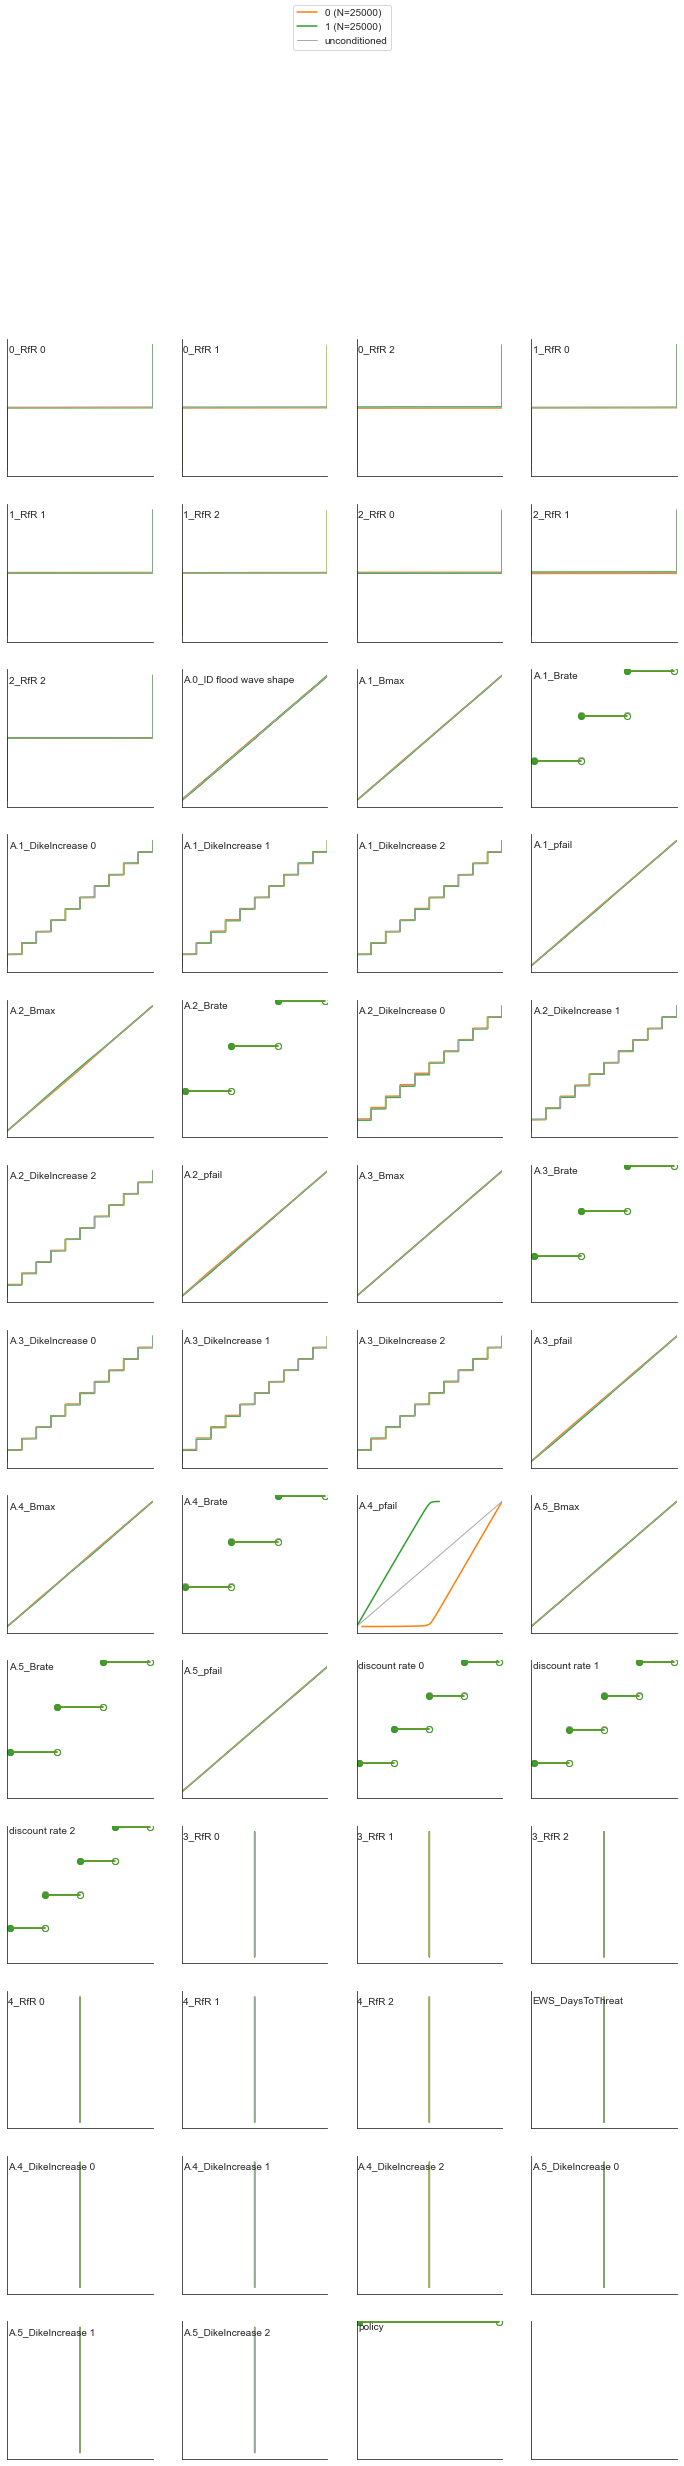

In [6]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes[DEATHS] >  np.percentile(a=outcomes_df[DEATHS], q=50)
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

In [10]:
outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0]

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,Scaled


Looks like there is always more damage in Deventer than in Gorssel if there are not any policies in place

In [11]:
len(outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0])

0

In [12]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Total Costs,Scaled
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.0,50000.000000
mean,-2195.842747,-1.820303e-06,4.394637e+07,0.021209,0.0,0.236309
std,2558.744855,2.280280e-06,4.660492e+07,0.020512,0.0,0.236181
min,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.000000
0%,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.000000
10%,-5852.691383,-5.174198e-06,2.804631e+06,0.001676,0.0,0.017638
20%,-3362.048957,-3.213099e-06,6.498399e+06,0.004197,0.0,0.042752
30%,-2033.402478,-1.871860e-06,8.958514e+06,0.004837,0.0,0.051459
40%,-1514.690034,-1.173131e-06,1.394666e+07,0.008550,0.0,0.087856
50%,-1213.798597,-7.219704e-07,1.998865e+07,0.010051,0.0,0.109276


Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [102]:
prim_algs = {}
percentiles = [20, 90]

def conditional(outcome, q):
    global percentiles
    if q == percentiles[0]:
        return outcomes_df[outcome] < np.percentile(a=outcomes_df[outcome], q=q)
    elif q == percentiles[1]:
        return outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=q)  
            
for q in percentiles:
    prim_algs[q] = {}   
    for outcome in [DAMAGE]:
        #code block below performs a rotation of data
    #     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
    #     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
    #     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, outcomes_df[outcome] > np.percentile(a=outcomes_df[outcome], q=90))
    #     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
    #     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
    #     x = rotated_x

        prim_algs[q][outcome] = prim.Prim(x,  conditional(outcome, q), threshold=0.8)

In [ ]:
boxes = {}
for upperkey in percentiles:
    boxes[upperkey] = {}
    for lowerkey in (DAMAGE):
        boxes[upperkey][lowerkey] = prim_algs[upperkey][lowerkey].find_box()

20


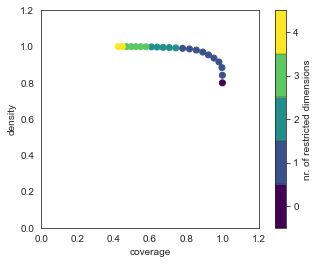

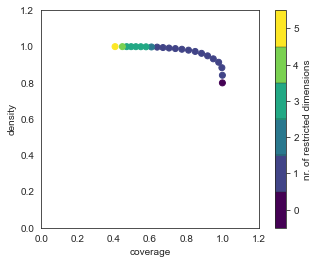

90


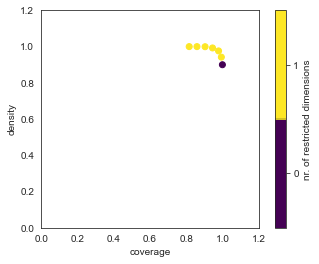

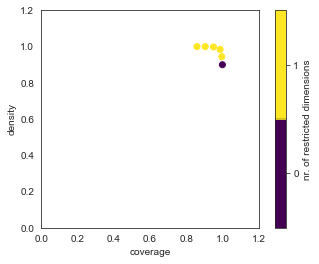

In [93]:
for upperkey, percentile in boxes.items():
    print(upperkey)
    for lowerkey, box in percentile.items():
        box.show_tradeoff()
        plt.show()

# Trying around to find the right box

## Damage

coverage    0.999975
density     0.842084
id                 1
mass            0.95
mean        0.842084
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.4_pfail  0.000014  0.950001  [-1.0, 2.182554292742046e-123]



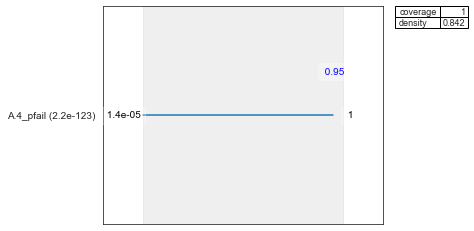

In [94]:
box_id=1
BOX = DAMAGE
boxes[percentiles[0]][BOX].inspect(box_id)
boxes[percentiles[0]][BOX].inspect(box_id, style='graph')
plt.show()

In [95]:
lims = boxes[percentiles[0]][BOX].box_lims[box_id]
limits = pd.DataFrame(data={"outcome": ["damage 90"], "y": [0], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})

coverage    0.994222
density     0.941895
id                 1
mass            0.95
mean        0.941895
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.4_pfail  0.050007  0.999988  [8.997893739434138e-236, -1.0]



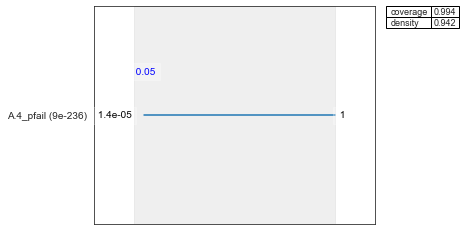

In [101]:
box_id=1
BOX = DAMAGE
boxes[percentiles[1]][BOX].inspect(box_id)
boxes[percentiles[1]][BOX].inspect(box_id, style='graph')
plt.show()

In [75]:
lims = boxes[percentiles[1]][BOX].box_lims[box_id]
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["damage 10"], "y": [0], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [76]:
limits

,outcome,y,min,max
0,damage 90,0,0.000014,0.950001
0,damage 10,0,0.000014,0.099266


## Deaths

In [77]:
box_id=1
BOX = DEATHS

coverage         1.0
density     0.841874
id                 1
mass            0.95
mean        0.841874
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.4_pfail  0.000014  0.950001  [-1.0, 2.476817542206021e-123]



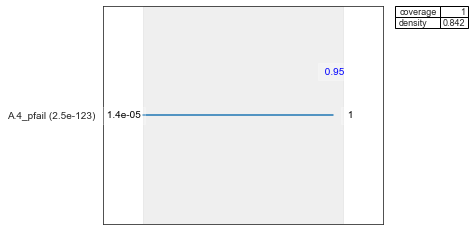

In [78]:
boxes[percentiles[0]][BOX].inspect(box_id)
boxes[percentiles[0]][BOX].inspect(box_id, style='graph')
plt.show()

In [79]:
lims = boxes[percentiles[0]][BOX].box_lims[box_id]

In [80]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths 90"], "y": [1], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

In [81]:
box_id=41
BOX = DEATHS

coverage    0.972367
density     0.796588
id                41
mass         0.12192
mean        0.796588
res_dim            1
Name: 41, dtype: object

             box 41                       
                min       max    qp values
A.4_pfail  0.000014  0.121914  [-1.0, 0.0]



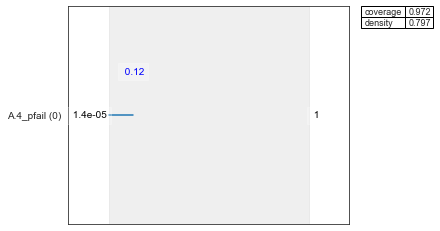

In [82]:
boxes[percentiles[1]][BOX].inspect(box_id)
boxes[percentiles[1]][BOX].inspect(box_id, style='graph')
plt.show()

In [85]:
lims = boxes[percentiles[1]][BOX].box_lims[box_id]

In [86]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths 90"], "y":[1], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})], axis=0)

# Visualisation

In [87]:
limits =limits.reset_index(drop=True)

In [88]:
limits

,outcome,y,min,max
0,damage 90,0,0.000014,0.950001
1,damage 10,0,0.000014,0.099266
2,deaths 90,1,0.000014,0.950001
3,deaths 90,1,0.000014,0.121914


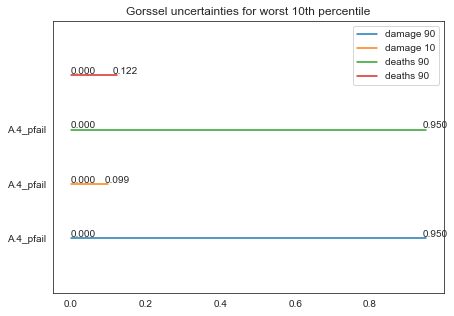

In [89]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))
ax.grid(False)
ax.set_ylim([-1,4])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2], ["A.4_pfail"]*3)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()

In [35]:
gorssel_scen = pd.read_csv("simulation/optimisation/Gorssel/selected.csv")

In [39]:
A4_pfail = gorssel_scen["A.4_pfail"]

In [36]:
cases = get_cases(ACTORNAME)

{0: 'best',
 1: 'low',
 2: 'middle',
 3: 'high',
 4: 'worst deaths',
 5: 'absolute worst'}

0.8704588494473585
0.7499832047699677
0.4782696450522153
0.2860451612585706
0.0342204558160026
0.0352572124797946


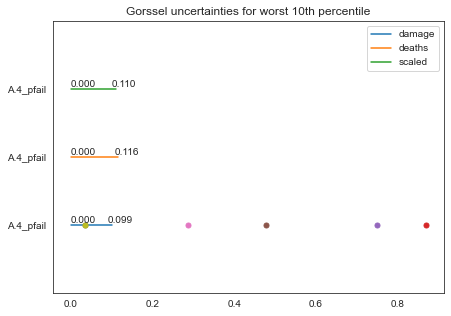

In [50]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.03))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.03))

for pfail in A4_pfail:
    plt.plot(pfail, 0, markersize=5,  marker='o')
    print(pfail)
    
ax.grid(False)
ax.set_ylim([-1,3])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1,2], ["A.4_pfail"]*3)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()

#Gorssel probability of dike success